<a href="https://colab.research.google.com/github/leonardorocc0/deeplearning/blob/main/ASCII_NN_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""

ver este video:
    https://www.youtube.com/watch?v=VAMKuRAh2nc
NLP Tutorial 11 - Automatic Text Generation using TensorFlow, Keras and LSTM

https://github.com/shywel/NLP-Tutorial-11---Automatic-Text-Generation-using-TensorFlow-Keras-and-LSTM/blob/master/Automatic_Text_Generation_Using_Keras_and_LSTM.ipynb

@author: Leo
"""
https://towardsdatascience.com/generating-eminem-lyrics-using-neural-networks-96e7f9c45e8a

https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/

----------------------------------------------------------------------------------------
# generador de texto usando keras ----------------------------------------------------------------------------------------
# siguiendo este ejemplo:
https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/
https://rodarmor.com/artnet/
https://github.com/karpathy/char-rnn

https://github.com/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/4.%20LSTM%20Text%20Generation/Keras%20LSTM%20Text%20Generation.ipynb
 ver de sacar cosas de art ascii generator: https://github.com/casey/artnet/blob/master/main


siguiendo generador de texto de eminem lo podria adaptar: 
https://towardsdatascience.com/generating-eminem-lyrics-using-neural-networks-96e7f9c45e8a    
https://github.com/rojagtap/eminem_lyrics_generator/blob/master/generator.ipynb
o este mejor:
https://github.com/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/4.%20LSTM%20Text%20Generation/Keras%20LSTM%20Text%20Generation.ipynb
q es de este video https://www.youtube.com/watch?v=QtQt1CUEE3w

In [ ]:
import requests

In [ ]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
import keras.models
import numpy as np
import random
import sys
import requests
import io

In [ ]:
#response = requests.get('http://cloud.pungas.space/index.php/s/md8f6ABpMPM5nbf/download') #si bajamos de pungas cloud ponerle el /download

In [45]:
#anda bien lo de abajo pero se cayo nextcloud :(
#files_asciis = ['https://cloud.pungas.space/index.php/s/qW2kcBAxcio23e2/download','http://cloud.pungas.space/index.php/s/md8f6ABpMPM5nbf/download','https://cloud.pungas.space/index.php/s/p7Q4gbEppDdz9Nt/download','https://cloud.pungas.space/index.php/s/iQ5qrbTWzCZDZx7/download','https://cloud.pungas.space/index.php/s/5xHDRCNGLikmZHE/download','https://cloud.pungas.space/index.php/s/WDcJJgARayQFfen/download','https://cloud.pungas.space/index.php/s/iyLNFrB6KtmtxR7/download','https://cloud.pungas.space/index.php/s/7DaSRokk4TZp6CK/download','https://cloud.pungas.space/index.php/s/ZpL6aT2c9jL4Twb/download','https://cloud.pungas.space/index.php/s/Xt5igHetkZBKWmG/download']
#files_asciis = ['https://16colo.rs/pack/mimic78/raw/ds%21-ill.txt','https://16colo.rs/pack/ds-fire/raw/ds%21-fire.txt','https://16colo.rs/pack/se-zeit/raw/se-zeit.txt']
files_asciis = ['https://16colo.rs/pack/mimic78/raw/ds%21-ill.txt','https://16colo.rs/pack/ds-fire/raw/ds%21-fire.txt','https://16colo.rs/pack/se-zeit/raw/se-zeit.txt','http://cloud.pungas.space/s/ZfzanT3R8xkHASz/download','https://cloud.pungas.space/s/Wzc9N7EBSTgPFtD/download','https://cloud.pungas.space/s/xQ9bmL8zC5dZBnB/download','https://cloud.pungas.space/s/xQ9bmL8zC5dZBnB/download','https://cloud.pungas.space/s/F82Dc9mJRDgeQCB/download','https://cloud.pungas.space/s/cbtg5SicMweQGYe/download','https://cloud.pungas.space/s/4LWQXwcmXY95HMx/download','https://cloud.pungas.space/s/xaxKY62XxkKGRRt/download','https://cloud.pungas.space/s/AXYHccTpBB7tofS/download','https://cloud.pungas.space/s/kd6qk36QFEn4wqg/download','https://cloud.pungas.space/s/7biscC4oRTDQbF5/download','https://cloud.pungas.space/s/RLQYkybqWeP8NL3/download','https://cloud.pungas.space/s/WwxEDmwqWpxqMSB/download','https://cloud.pungas.space/s/o7aQcZJBNcot5q7/download','https://cloud.pungas.space/s/oo2ajY8d9bk7t2j/download','https://cloud.pungas.space/s/9LydGbzJga6PqSL/download','https://cloud.pungas.space/s/QkLNFSrjkMex2G3/download']
#,'https://subcultura.digital/arleka/a!-ssr.txt','https://subcultura.digital/arleka/a!-fuckd.txt','https://subcultura.digital/arleka/asl-ads.txt','https://subcultura.digital/arleka/se-late.txt','https://subcultura.digital/arleka/se-getse.txt','https://subcultura.digital/arleka/lp-fs.txt','https://subcultura.digital/arleka/ed-mjau.txt','https://subcultura.digital/arleka/dz-fow.txt','https://subcultura.digital/arleka/ds-home.txt','https://subcultura.digital/arleka/ds!-ttya.txt','https://subcultura.digital/arleka/ds!-dive.txt','https://subcultura.digital/arleka/azk-fame.txt','https://subcultura.digital/arleka/asl-ftm.txt']

In [46]:
# agregamos todas las collies de files_asciis
lines = '' 
for filename in files_asciis: 
  file = requests.get(filename)
  lines += file.text

In [47]:
# load ascii text y mostrarlo que ande bien
#raw_text = response.text
raw_text = lines






                                       ____________
                               _______/            \_
                             _/      /              /
                      ____  /       /              /
               ___  _/   / /       /              /    HACIEND BBS SINCE 1996
               \__\ \___/ ·       /              ·
  _______       ______   _____   · _____   ______          ______  _________
  \     /__   __\__   \__\ ._/_____\_  /__/   __/_________/     /__\__     /\
  /   _    \_/   |/    /   |/    /  /_/  \    _>/   \  _  \    /    |/    /  \
_/    /     /    /    /    /    /        /   /_/    /   \     /     /    /.  /
\____/     /____/_____\_________\_______/_____     /____/    /____________|\/
 \  /______\    \      \         \      \    /_____\   /______/\          \ \
  \_\       \____\______\_________\______\___\      \__\      \ \__________\/
     \_______\                                \______\  \______\/h7/dS!
           ____  ·       ·        
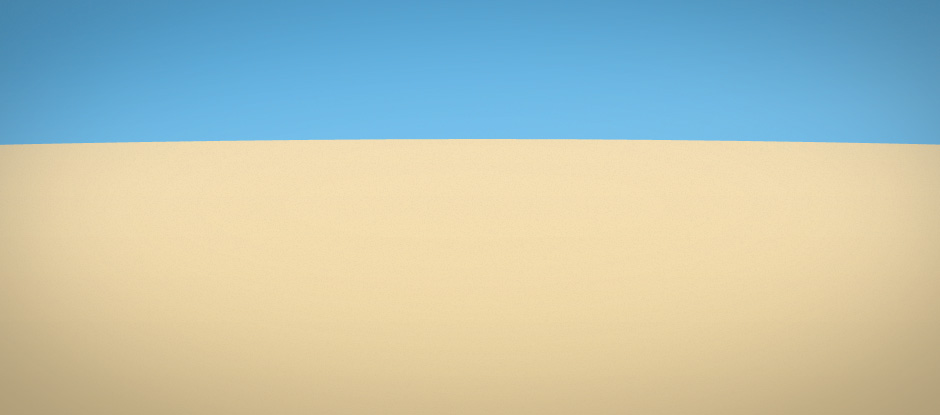
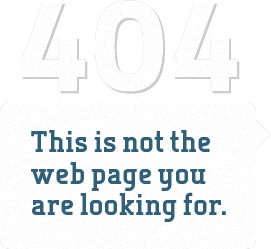
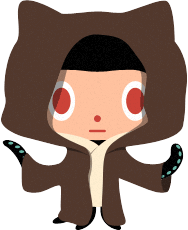
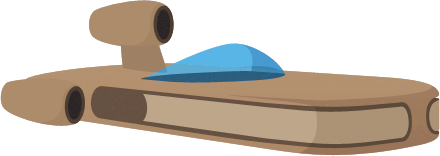
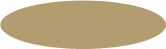
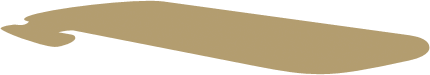
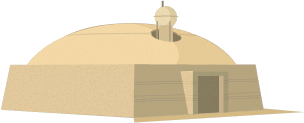
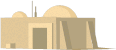
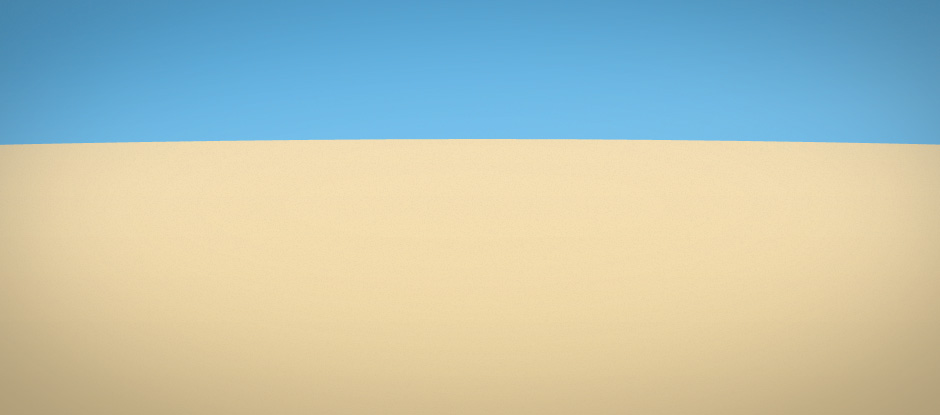
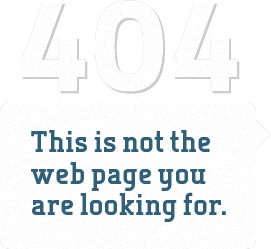
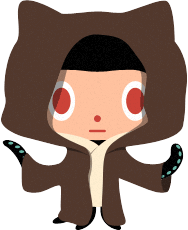
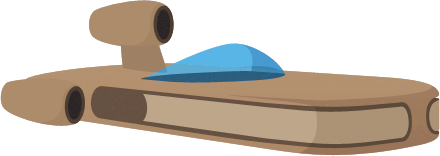
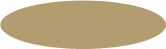
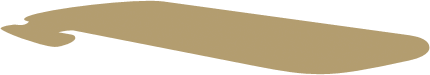
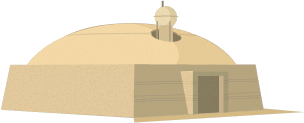
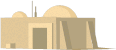
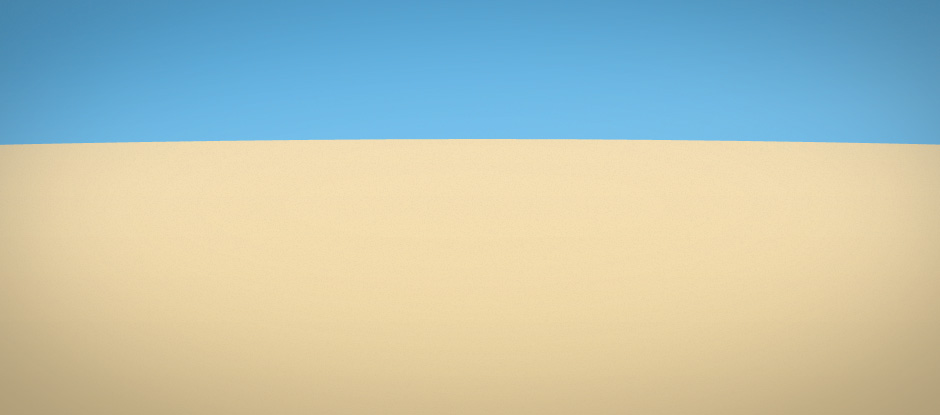
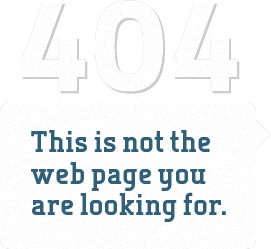
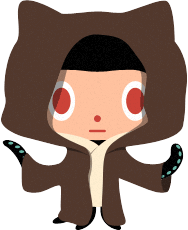
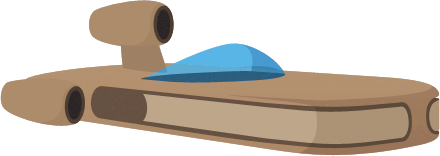
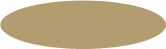
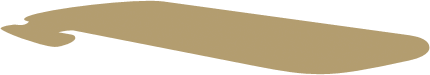
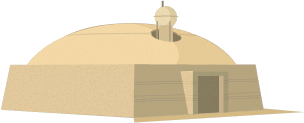
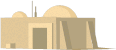
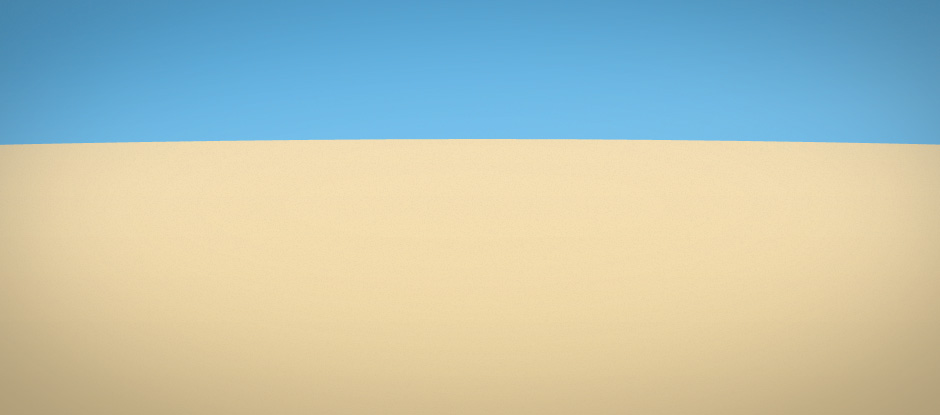
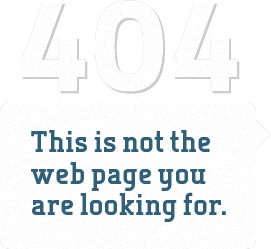
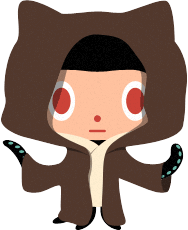
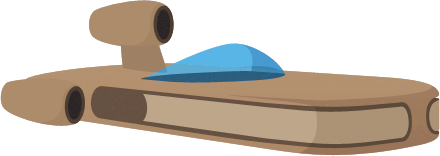
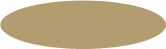
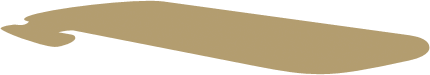
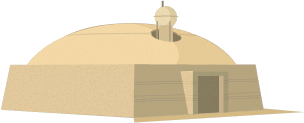
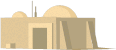
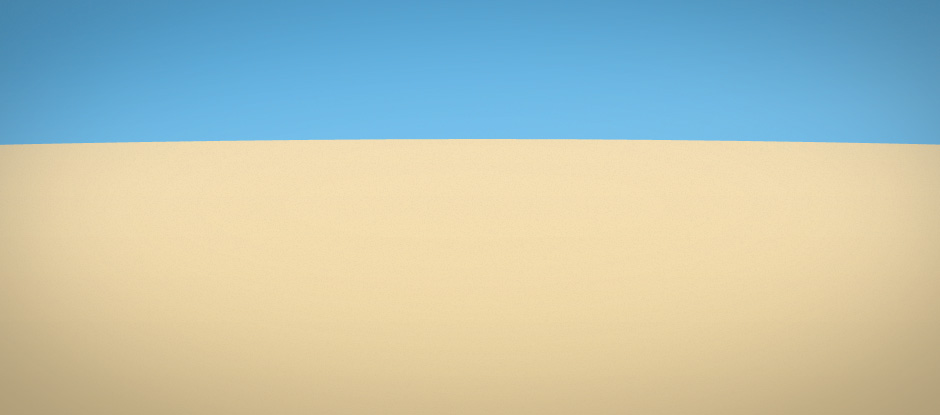
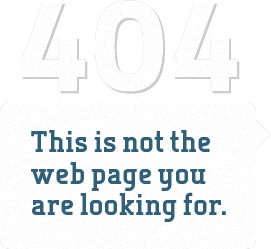
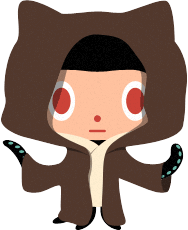
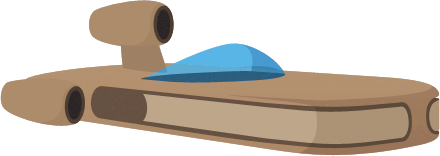
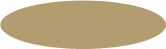
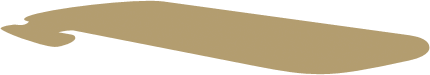
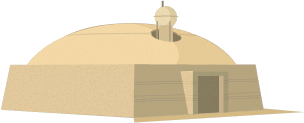
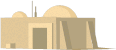
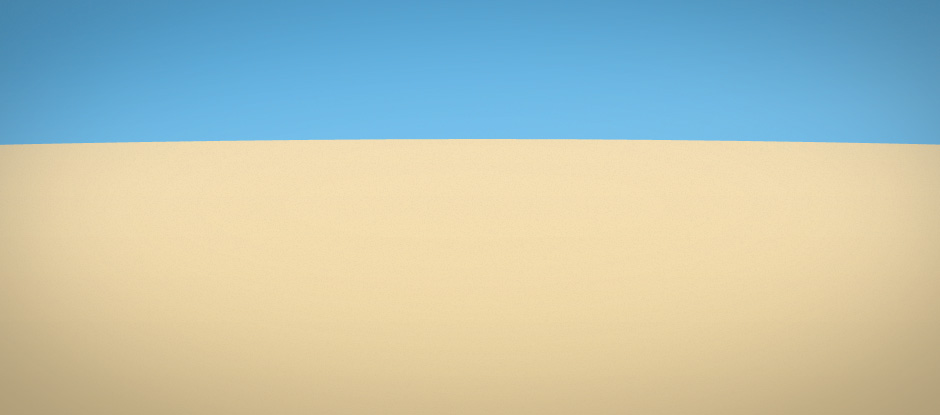
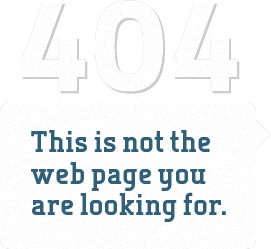
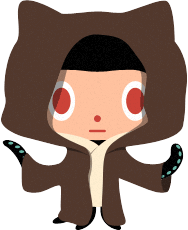
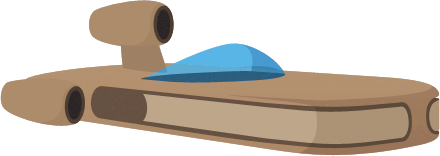
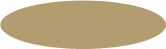
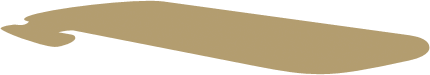
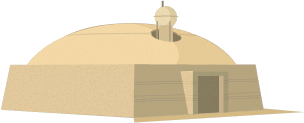
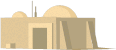
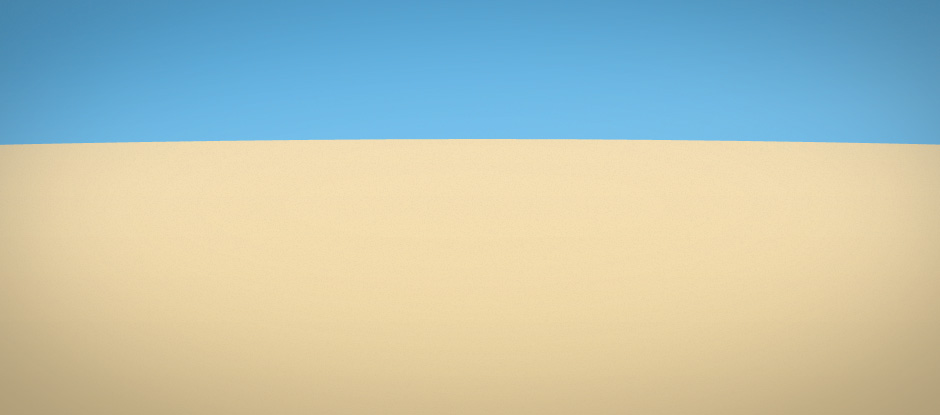
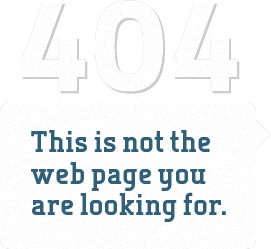
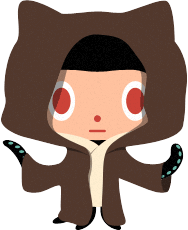
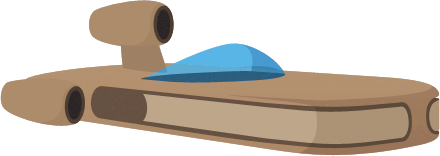
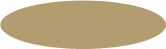
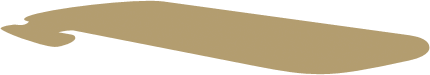
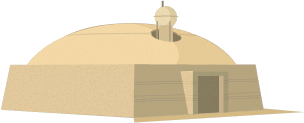
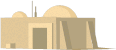
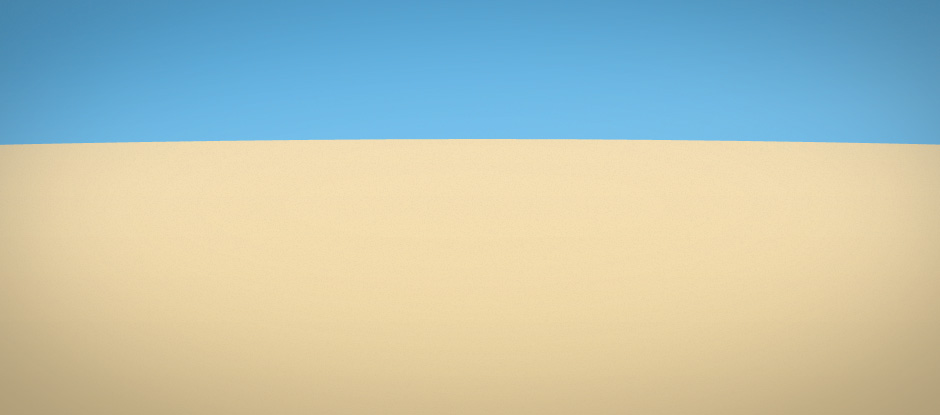
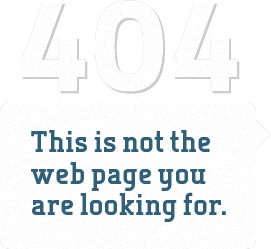
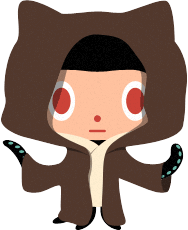
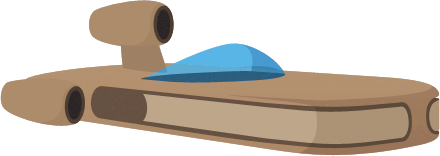
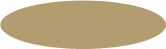
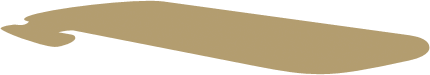
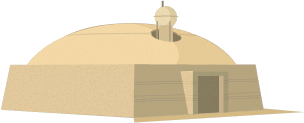
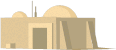
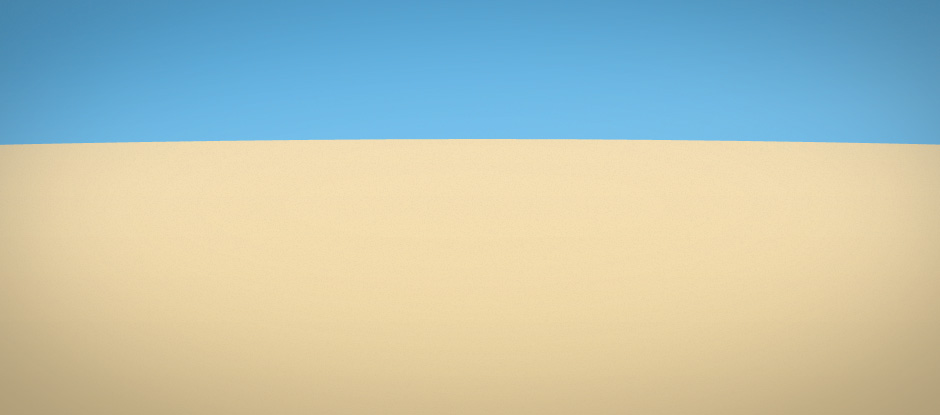
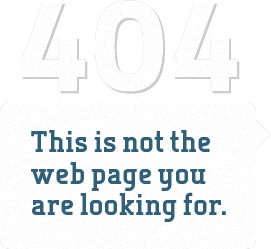
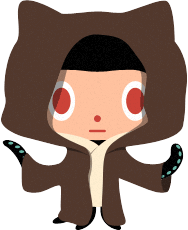
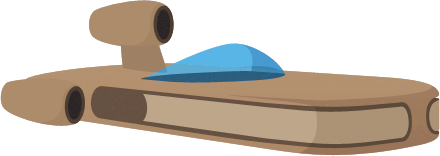
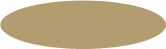
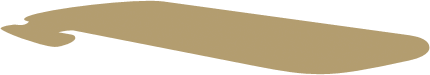
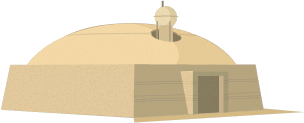
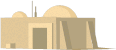
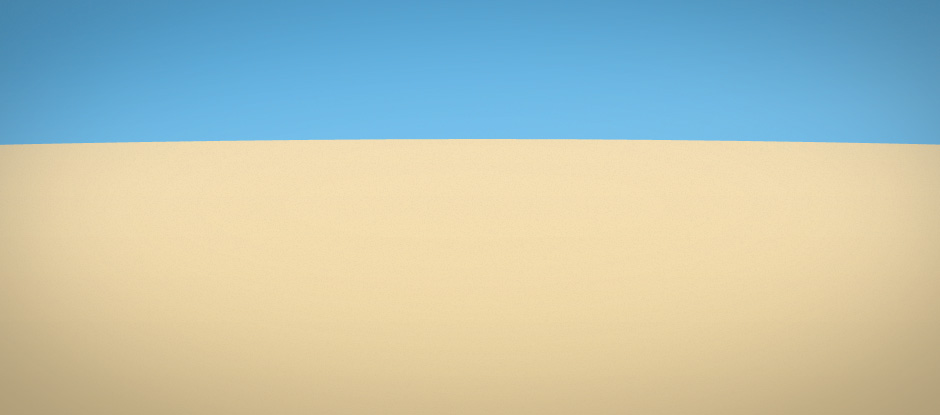
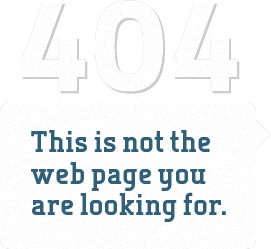
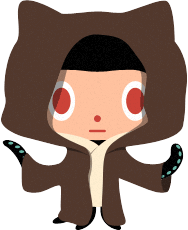
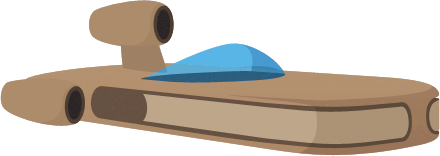
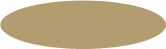
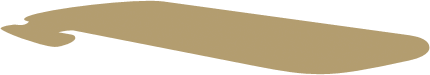
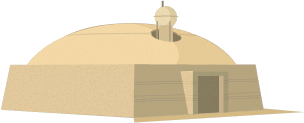
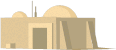
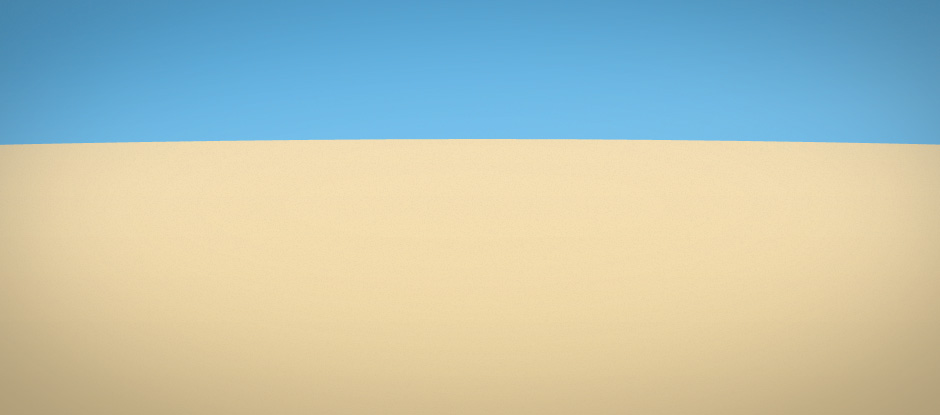
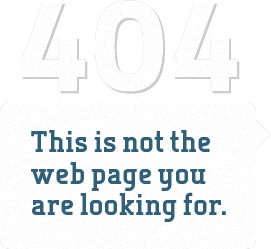
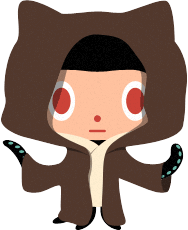
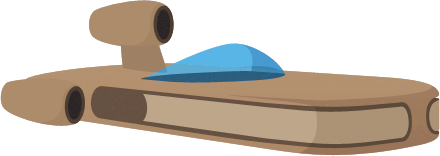
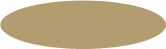
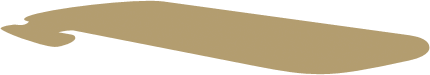
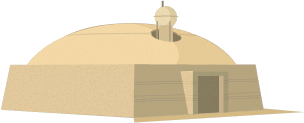
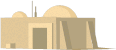

In [48]:
# si queremos ver que cargo bien...
print(raw_text)

In [ ]:
#remove unnecessary letters. WARNING: oldschool ascii art contains all kind of letters :)
raw_text = raw_text.lower()
#for char in 'abcdefghijklmnopqrstuvwxyz0123456789':
for char in 'abcdefghijklmnopqrstuvwxyz0123456789¤µ¹âåäéëê¸±¶áßæ°ñ·¬ø¡½þúöó?#':
    raw_text = raw_text.replace(char,' ')
#    print(char)

In [ ]:
#Map chars to integers
# create mapping of unique chars to integers
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))

char_indices = dict((c, i) for i, c in enumerate(chars))  #char to int
"""eg: '#': 4,
 '$': 5,
 '%': 6"""
indices_char = dict((i, c) for i, c in enumerate(chars))   #int to char
"""Eg: 4: '#',
 5: '$',
 6: '%',"""

"Eg: 4: '#',\n 5: '$',\n 6: '%',"

In [ ]:
#QA check left over charset
set(raw_text)

{'\t',
 '\n',
 '\r',
 ' ',
 '!',
 '"',
 '#',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '¦',
 '©',
 '¯',
 '´',
 'í',
 '÷'}

In [ ]:
#Split up into subsequences
# prepare the dataset of input to output pairs encoded as integers
# each character has a chance to be learned from the (seq_lenght) characters that preceded 
# it (except the first seq_lenght characters of course).

maxlen = 250  #probar con 40 o mas
step = 10
sentences = []
"""Eg sentences:
     '   /__/  _   /\\_  _  /__/  /___/\\_ _/__/',
 '/__/  _   /\\_  _  /__/  /___/\\_ _/__/ __',
 """
next_chars = []
"""Eg next_chars:
    ' ',
 '_',
 '/',"""
# basicamente lo que vamos a hacer es recorrer todo raw_text para decirle "estas secuencias de texto
# de X maxlen preceden al feature o caracter next_char. 
for i in range(0, len(raw_text) - maxlen, step):
    sentences.append(raw_text[i: i + maxlen]) #traemos una sentencia, desde i al maxlen+i
    next_chars.append(raw_text[i + maxlen]) #traemos un solo caracter, el maxlen+i
print('nb sequences:', len(sentences), 'hay tantos chars:',len(next_chars))
print ('ejemplos de sequencias:')
print(sentences[:10])
print('ejemplos de next chars:')
print(next_chars[:10])

nb sequences: 30417 hay tantos chars: 30417
ejemplos de sequencias:
['\n\n\n\n\n                                       ____________\n                               _______/            \\_\n                             _/      /              /\n                      ____  /       /              /\n               ___  _/   / /    ', '                                  ____________\n                               _______/            \\_\n                             _/      /              /\n                      ____  /       /              /\n               ___  _/   / /       /      ', '                        ____________\n                               _______/            \\_\n                             _/      /              /\n                      ____  /       /              /\n               ___  _/   / /       /              / ', '              ____________\n                               _______/            \\_\n                             _/      /              /\n         



Building Model

In this notebook a small recurrent neural networks is used for both simplicity and 
because of the training time but if you want to train a more sophisticated model you 
can increase the size of the network. You can also use a model pretrained on some 
other text like wikipedia text to both speed up the training process and get 
better results.


"""we must transform the list of input sequences into the form [samples, time steps, features] expected by an LSTM network.
Next we need to rescale the integers to the range 0-to-1 to make the patterns easier to learn by the LSTM network that uses 
the sigmoid activation function by default.
Finally, we need to convert the output patterns (single characters converted to integers) 
into a one hot encoding. This is so that we can configure the network to predict 
the probability of each of the 47 different characters in the vocabulary 
(an easier representation) rather than trying to force it to predict precisely the next 
character
Each y value is converted into a sparse vector with a length of 47, full of zeros except 
with a 1 in the column for the letter (integer) that the pattern represents.

Ej par aun caracter:
    [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]

Esto es mas facil para mapear cada entrada como bits en lugar de valores integer
"""



In [ ]:

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool) #labels?
y = np.zeros((len(sentences), len(chars)), dtype=np.bool) #features?
for i, sentence in enumerate(sentences): #ver esto! creamos matrices
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

print ('ejemplo x ---------------------')
print(x[:1])
print('size:',x.shape,' y longitud:',x.size)
print ('ejemplo y: --------------------')
print(y[:1])
print('size:',y.shape,' y longitud:',y.size)


ejemplo x ---------------------
[[[False  True False ... False False False]
  [False  True False ... False False False]
  [False  True False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
size: (30417, 250, 40)  y longitud: 304170000
ejemplo y: --------------------
[[False False False  True False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]]
size: (30417, 40)  y longitud: 1216680


In [32]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
#definimos modelos y layers
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
#model.add(Dense(1000, activation='tanh', kernel_initializer='normal', name='idontknow',bias_regularizer='l2', kernel_regularizer='l2'))
model.add(Dropout(0.20))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
optimizer = RMSprop(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


In [ ]:
# IMPORTANTE: GUARDAR ESTA CONFIGURACION SI PIENSO USARLA EN OTRO LADO
print('guardar la configuracion del modelo somwhere')
print(model.summary())
print ('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print('input_shape: maxlen:',maxlen,'len(chars):',len(chars))

guardar la configuracion del modelo somwhere
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               86528     
_________________________________________________________________
idontknow (Dense)            (None, 1000)              129000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 40)                40040     
_________________________________________________________________
activation (Activation)      (None, 40)                0         
Total params: 255,568
Trainable params: 255,568
Non-trainable params: 0
_________________________________________________________________
None
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
input_shape: maxlen: 

In [ ]:

# Helper Functions
#These helper functions are taken from the official Keras text generation notebook.

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(raw_text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = raw_text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
# Defining callbacks
# aca onda que definimos todos los calls que va a hacer, checkpoints, el modelo

from keras.callbacks import ModelCheckpoint

filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss',
                             verbose=1, save_best_only=True,
                             mode='min')


from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=1, min_lr=0.001)


callbacks = [print_callback, checkpoint, reduce_lr]


**Epochs**
    One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.  
**'Batch Size'**
    Total number of training examples present in a single batch.  
**Iterations** is the number of batches needed to complete one epoch.  
*Eg: We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.*

In [33]:
# Training the model ###################################################
# ojo puede tardar bocha segun los parametros que le pase
model.fit(x, y, batch_size=256, epochs=1, callbacks=callbacks)

119/119 [==============================] - 137s 1s/step - loss: 3.9132

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "             ________    /                      -                    _ _/
             \      /___/       ______     \  _______  ____     _________
       ______/     /    /____ __\___  \_  __\ \     /_/  _/ ____\_      /
      /     /     /    /    "
             ________    /                      -                    _ _/
             \      /___/       ______     \  _______  ____     _________
       ______/     /    /____ __\___  \_  __\ \     /_/  _/ ____\_      /
      /     /     /    /    ___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [34]:
#Testing the model

# Now that we have a trained network we can test it using a method simular to the on_epoch_end method above.

def generate_text(length, diversity):
    # Get random starting text
    start_index = random.randint(0, len(raw_text) - maxlen - 1)
    generated = ''
    sentence = raw_text[start_index: start_index + maxlen]
    generated += sentence
    for i in range(length):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char
    return generated



In [44]:
####### generamos asciissss laralalalaa ----------------------------
print(generate_text(160, 1.45))

        \   \/                  
        _______    _____    ____/     _____\  _\___       ________
        \     /___/   _/___ \  (______\   /_\/   _/___ ___\__    /
         \___    /   _/   /--\___   /\_    _/   _/   /.\   _/   / 
           /__________- _
_-______ :__ 
:_\____________ :_

 :/ _____ _____/___\____ ___#___\_____\__# -_____
  _#
_##--  -#
___    
   /-/___
__- __
_ _#/#
 _ _

__  ____ ____


**---- SECCION PARA GUARDAR, BAJAR Y CARGAR MODELOS de KERAS**

In [ ]:
# #### SAVE EL MODELO ####
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_ascii_model_1')

In [ ]:
#inspeccionamos el modelo salvado y ese directorio
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_ascii_model_1

my_ascii_model_1
saved_model/my_ascii_model_1


In [ ]:
# OTRA MANERA DE SALVARLO ##
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#### DOWNLOAD EL MODELO #### DE GOOGL si lo quiero usar en la maquina local <3
from google.colab import files
files.download('weights.hdf5') 
files.download('saved_model/my_ascii_model_1')
files.download('model.json')
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ** ##### LOAD ##### a Keras model from the saved model ** ------------------------------
model = keras.models.load_model('saved_model/my_ascii_model_1')

# Check its architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               99840     
_________________________________________________________________
dense_2 (Dense)              (None, 66)                8514      
_________________________________________________________________
activation_2 (Activation)    (None, 66)                0         
Total params: 108,354
Trainable params: 108,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

> #### ARLEKA NEXT STEPS: 
- 1) ver porque en algun momento esta spliteando palabras por espacios o algo asi. asi en el articulo es que genera textos esta basado en adivinar palabras, no next char.  
- 2) **con poca diversidad directamente pega partes enteras del file de entrenamiento* :(** 
  podria usar un mejor tokenizador del ejemplo de: ## Text Generation using Tensorflow, Keras and LSTM
Watch Full Video Lesson: https://youtu.be/VAMKuRAh2nc


